#### Ví dụ bài toán thực tế
Cho chiều cao của một người bất kỳ, hãy dự đoán cân nặng của họ biết rằng có một số dữ liệu thống kê chiều cao và cân nặng như sau:

| Chiều cao (cm) | Cân nặng (kg) | Chiều cao (cm) | Cân nặng (kg) |
| --- | --- | --- | --- |
| 147 | 49  | 168 | 60  |
| 150 | 50  | 170 | 62  |
| 153 | 51  | 173 | 63  |
| 155 | 52  | 175 | 64  |
| 158 | 54  | 178 | 66  |
| 160 | 56  | 180 | 67  |
| 163 | 58  | 183 | 68  |
| 165 | 59  |     |     |

Như vậy ta có mô hình dự đoán ciều cao (Mô hình hồi quy tuyến tính):

$Chiều Cao Ứớc Lượng = \theta_0 + \theta_1 * Chiều Cao$

Vấn đề đặt ra là tìm được bộ tham số $\theta^* = (\theta_0, \theta_1)$ sao cho kết quả dự đoán có sai số thấp nhất

Ta có hàm tính sai số:

$MSE(\theta)=\frac{1}{m} \sum_{i=1}^m (y-y^*)^2$

Trong đó y là giá trị thực tế, y* là giá trị dự đoán

Như vậy để có sai số thấp nhất thì cần tìm cực tiểu của hàm $MSE(\theta)$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [33]:
# height (cm)
X = np.array([[147, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49,  50,  51,  52,  54,  56,  58,  59,  60,  62,  63,  64,  66, 67, 68]]).T

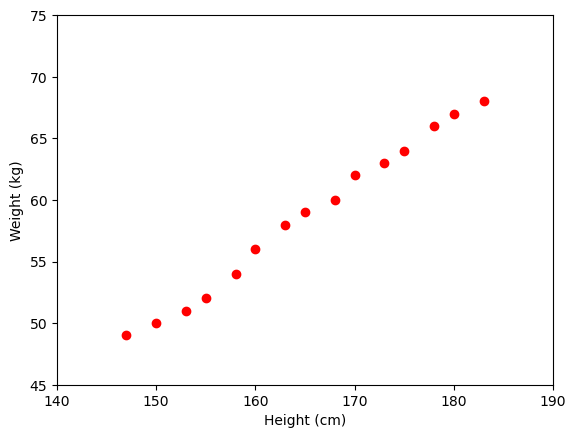

In [34]:
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Tính toán

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Make predictions 
y_pred = lin_reg.predict(X)
# lin_reg.intercept_, lin_reg.coef_
# Ước lượng cân nặng đơn giản
ChiềuCao = np.array([[170.0]])
CânNặng = lin_reg.predict(ChiềuCao)
print('Chiều cao =', ChiềuCao[0][0], 'thì cân nặng là', CânNặng[0][0], 'kg')

Chiều cao = 170.0 thì cân nặng là 61.30631437527989 kg


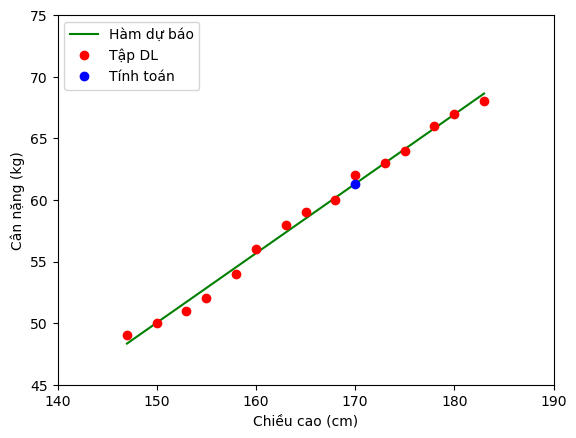

In [36]:
plt.plot(X, y_pred, "g-", label='Hàm dự báo')        # Đồ thị của kết quả tính bằng thư viện
plt.plot(X, y, "ro", label='Tập DL')
plt.plot(ChiềuCao, CânNặng, "bo", label='Tính toán')
plt.legend(loc='upper left')
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

#### Nhạy cảm với nhiễu
Thêm nhiễu để thể hiện rằng hồi quy tuyến tính rất nhạy cảm với nhiễu

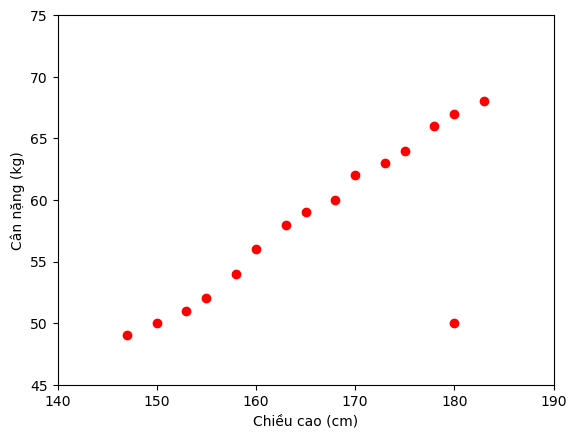

In [37]:
# Thêm nhiễu
X = np.append(X, np.array([[180]]).T, axis=0)
y = np.append(y, np.array([[50]]).T, axis=0)
# Vẽ lại đồ thị
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()

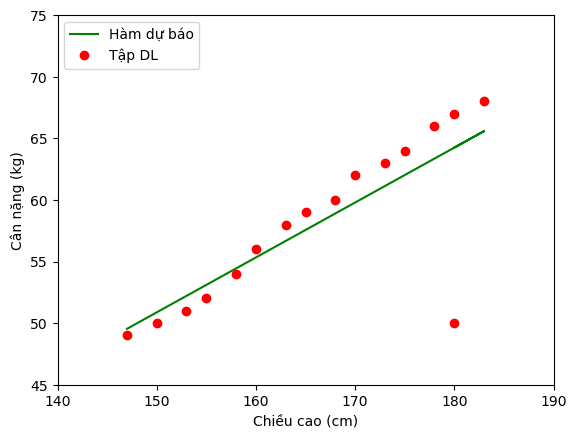

In [38]:
# Tính lại hàm dự báo
lin_reg.fit(X, y)
# Vẽ lại đồ thị
y_pred = lin_reg.predict(X)
plt.plot(X, y_pred, "g-", label='Hàm dự báo')        # Đồ thị của kết quả tính bằng thư viện
plt.plot(X, y, "ro", label='Tập DL')
plt.legend(loc='upper left')
plt.axis([140, 190, 45, 75])
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Cân nặng (kg)')
plt.show()